In [1]:
#import pandas,numpy,matplotlib,seaborn,datetime libraries
import pandas as pd
import numpy as np
import datetime
from datetime import date

import seaborn as sns
import matplotlib.pyplot as plt
# importing twitter api libraries
import yaml
from yaml.loader import SafeLoader
from twitter import *

# Import the YAML file - remember to specify the whole path.
twitter_creds = yaml.safe_load(open('twitter.yaml', 'r').read())

# Pass your Twitter credentials.
twitter_api = Twitter(auth=OAuth(twitter_creds['access_token'],
                                 twitter_creds['access_token_secret'], 
                                 twitter_creds['api_key'],
                                 twitter_creds['api_secret_key'] ))



# Set figure size.
sns.set(rc={'figure.figsize':(15, 12)})

# Set the plot style as white.
sns.set_style('white')

# Maximum column width to display
pd.options.display.max_colwidth = 200
# Optional - Ignore warnings.
import warnings
warnings.filterwarnings('ignore')

###### Importing the required  libraries
 I begin the Exploratory Data Analysis, by importing the all required libraries. The majority the data analysis task presented here will be accomplished with the Pandas library. However, other included libraries like,numpy, seaborn,datetime,twitter etc., would be used for specific purposes.


######  Importing the required datafiles into Pandas
'ad' is new dataframe which reads the 'actual_duration.csv' file using the read_csv() in Pandas.

In [2]:
# Import and sense-check the actual_duration.csv data set as ad.
ad = pd.read_csv('actual_duration.csv')
#printng the ad datatframe shape
print(" ad dataframe shape:", ad.shape)

 ad dataframe shape: (137793, 8)


In [3]:
# Printng the ad dataframe column
print("ad  dataframe columns:  ",ad.columns)

ad  dataframe columns:   Index(['sub_icb_location_code', 'sub_icb_location_ons_code',
       'sub_icb_location_name', 'icb_ons_code', 'region_ons_code',
       'appointment_date', 'actual_duration', 'count_of_appointments'],
      dtype='object')


In [4]:
#Printng and checking  the data types
print("ad  dtype:  ",ad.dtypes)

ad  dtype:   sub_icb_location_code        object
sub_icb_location_ons_code    object
sub_icb_location_name        object
icb_ons_code                 object
region_ons_code              object
appointment_date             object
actual_duration              object
count_of_appointments         int64
dtype: object


In [5]:
# checking the ad- dataframe head 
ad.head()

,sub_icb_location_code,sub_icb_location_ons_code,sub_icb_location_name,icb_ons_code,region_ons_code,appointment_date,actual_duration,count_of_appointments
0,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,31-60 Minutes,364
1,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,21-30 Minutes,619
2,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,6-10 Minutes,1698
3,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,Unknown / Data Quality,1277
4,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,16-20 Minutes,730


In [6]:
# checking the ad- dataframe tail
ad.tail()

,sub_icb_location_code,sub_icb_location_ons_code,sub_icb_location_name,icb_ons_code,region_ons_code,appointment_date,actual_duration,count_of_appointments
137788,X2C4Y,E38000254,NHS West Yorkshire ICB - X2C4Y,E54000054,E40000012,30-Jun-22,31-60 Minutes,430
137789,X2C4Y,E38000254,NHS West Yorkshire ICB - X2C4Y,E54000054,E40000012,30-Jun-22,21-30 Minutes,751
137790,X2C4Y,E38000254,NHS West Yorkshire ICB - X2C4Y,E54000054,E40000012,30-Jun-22,16-20 Minutes,921
137791,X2C4Y,E38000254,NHS West Yorkshire ICB - X2C4Y,E54000054,E40000012,30-Jun-22,11-15 Minutes,1439
137792,X2C4Y,E38000254,NHS West Yorkshire ICB - X2C4Y,E54000054,E40000012,30-Jun-22,1-5 Minutes,1739


In [7]:
#To sense check if there are any missing values in the ad dataframe
ad_na = ad[ad.isna().any(axis=1)]
ad_na.shape

(0, 8)

In [8]:
# sense checking  ad - statistical description
ad.describe()


,count_of_appointments
count,137793.000000
mean,1219.080011
std,1546.902956
min,1.000000
25%,194.000000
50%,696.000000
75%,1621.000000
max,15400.000000


In [9]:
# metadata info for ad dtataframe
ad.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137793 entries, 0 to 137792
Data columns (total 8 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   sub_icb_location_code      137793 non-null  object
 1   sub_icb_location_ons_code  137793 non-null  object
 2   sub_icb_location_name      137793 non-null  object
 3   icb_ons_code               137793 non-null  object
 4   region_ons_code            137793 non-null  object
 5   appointment_date           137793 non-null  object
 6   actual_duration            137793 non-null  object
 7   count_of_appointments      137793 non-null  int64 
dtypes: int64(1), object(7)
memory usage: 8.4+ MB


######  Sense checking ad dataframe
After succesfully loading the .csv file 'actual_duration.csv' to the ad dataframe, various sense-checking steps are followed to determine the quality and the pattern of data. Firstly shape of the dataframe is printed, which the number of rows and columns.
Then the list of columns are identified. Followed by 'dtypes' property of the dataframe, which shows the data tpye of each column. The respective head and tail of the dataframe are also printed to give quick snapshot of the data.
Further, any missing values are verified and confirmed to be none.
the statistical function 'describe' is printed to ascertain the data distribution.Finally, the metadata info is also printed.This completets the sense checking process of ad dataframe.

######  Importing the required datafiles into Pandas
'ar' is new dataframe which reads the 'appointment_regional.csv' file using the read_csv() in Pandas.

In [10]:
# Import and sense-check the actual_duration.csv data set as ar
ar = pd.read_csv('appointments_regional.csv')
#printng the ar datatframe shape
print(" ar dataframe shape:", ar.shape)#read the .csv files


 ar dataframe shape: (596821, 7)


In [11]:
# Printng the ar dataframe column
print("ar  dataframe columns:  ",ar.columns)

ar  dataframe columns:   Index(['icb_ons_code', 'appointment_month', 'appointment_status', 'hcp_type',
       'appointment_mode', 'time_between_book_and_appointment',
       'count_of_appointments'],
      dtype='object')


In [12]:
#Printng and checking  the data types
print("ar  dtype:  ",ar.dtypes)

ar  dtype:   icb_ons_code                         object
appointment_month                    object
appointment_status                   object
hcp_type                             object
appointment_mode                     object
time_between_book_and_appointment    object
count_of_appointments                 int64
dtype: object


In [13]:
# checking the ar- dataframe head 
ar.head()

,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
0,E54000034,2020-01,Attended,GP,Face-to-Face,1 Day,8107
1,E54000034,2020-01,Attended,GP,Face-to-Face,15 to 21 Days,6791
2,E54000034,2020-01,Attended,GP,Face-to-Face,2 to 7 Days,20686
3,E54000034,2020-01,Attended,GP,Face-to-Face,22 to 28 Days,4268
4,E54000034,2020-01,Attended,GP,Face-to-Face,8 to 14 Days,11971


In [14]:
# checking the ar- dataframe tail
ar.tail()

,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
596816,E54000050,2022-06,Unknown,Unknown,Unknown,2 to 7 Days,21
596817,E54000050,2022-06,Unknown,Unknown,Unknown,22 to 28 Days,8
596818,E54000050,2022-06,Unknown,Unknown,Unknown,8 to 14 Days,28
596819,E54000050,2022-06,Unknown,Unknown,Unknown,More than 28 Days,17
596820,E54000050,2022-06,Unknown,Unknown,Unknown,Same Day,10


In [15]:
#To sense check if there are any missing values in the ar dataframe
ar_na = ar[ar.isna().any(axis=1)]
ar_na.shape

(0, 7)

In [16]:
# sense checking  ar - statistical description
ar.describe()


,count_of_appointments
count,596821.000000
mean,1244.601857
std,5856.887042
min,1.000000
25%,7.000000
50%,47.000000
75%,308.000000
max,211265.000000


In [17]:
# metadata info for ar dtataframe
ar.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 596821 entries, 0 to 596820
Data columns (total 7 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   icb_ons_code                       596821 non-null  object
 1   appointment_month                  596821 non-null  object
 2   appointment_status                 596821 non-null  object
 3   hcp_type                           596821 non-null  object
 4   appointment_mode                   596821 non-null  object
 5   time_between_book_and_appointment  596821 non-null  object
 6   count_of_appointments              596821 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 31.9+ MB


######  Sense checking ar dataframe
After succesfully loading the .csv file 'appointments_regional.csv' to the ad dataframe, various sense-checking steps are followed to determine the quality and the pattern of data. Firstly shape of the dataframe is printed, which the number of rows and columns.
Then the list of columns are identified. Followed by dtypes of the dataframe, which shows the data tpye of each column. The respective head and tail of the dataframe are also printed to give quick snapshot of the data.
Further, any missing values are verified and confirmed to be none.
the statistical finction 'describe' is printed to ascertain the data distribution.Finally, the metadata info is also printed.This completets the sense checking process of ar dataframe.

In [18]:
# Import and sense-check the national_categories.xlsx data set as nc
nc = pd.read_excel('national_categories.xlsx')
#printng the nc datatframe shape
print(" nc dataframe shape:  ", nc.shape)


 nc dataframe shape:   (817394, 8)


In [19]:
# Printng the nc dataframe column
print("nc  dataframe columns:  ",nc.columns)

nc  dataframe columns:   Index(['appointment_date', 'icb_ons_code', 'sub_icb_location_name',
       'service_setting', 'context_type', 'national_category',
       'count_of_appointments', 'appointment_month'],
      dtype='object')


In [20]:
#Printng and checking  the data types
print("nc  data type:  ",nc.dtypes)

nc  data type:   appointment_date         datetime64[ns]
icb_ons_code                     object
sub_icb_location_name            object
service_setting                  object
context_type                     object
national_category                object
count_of_appointments             int64
appointment_month                object
dtype: object


In [21]:
# checking the nc- dataframe head 
nc.head()

,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month
0,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Primary Care Network,Care Related Encounter,Patient contact during Care Home Round,3,2021-08
1,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Other,Care Related Encounter,Planned Clinics,7,2021-08
2,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Home Visit,79,2021-08
3,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,General Consultation Acute,725,2021-08
4,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Structured Medication Review,2,2021-08


In [22]:
# checking the nc- dataframe tail
nc.tail()

,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month
817389,2022-06-30,E54000054,NHS West Yorkshire ICB - X2C4Y,Extended Access Provision,Care Related Encounter,Unplanned Clinical Activity,12,2022-06
817390,2022-06-30,E54000054,NHS West Yorkshire ICB - X2C4Y,Extended Access Provision,Care Related Encounter,Planned Clinics,4,2022-06
817391,2022-06-30,E54000054,NHS West Yorkshire ICB - X2C4Y,Extended Access Provision,Care Related Encounter,Planned Clinical Procedure,92,2022-06
817392,2022-06-30,E54000054,NHS West Yorkshire ICB - X2C4Y,Extended Access Provision,Care Related Encounter,General Consultation Routine,4,2022-06
817393,2022-06-30,E54000054,NHS West Yorkshire ICB - X2C4Y,Extended Access Provision,Care Related Encounter,General Consultation Acute,19,2022-06


In [23]:
#To sense check if there are any missing values in the nc dataframe
nc_na = nc[nc.isna().any(axis=1)]
nc_na.shape

(0, 8)

In [24]:
# sense checking  nc - statistical description
nc.describe()


,count_of_appointments
count,817394.000000
mean,362.183684
std,1084.576600
min,1.000000
25%,7.000000
50%,25.000000
75%,128.000000
max,16590.000000


In [25]:
# metadata info for nc dtataframe
nc.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 817394 entries, 0 to 817393
Data columns (total 8 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   appointment_date       817394 non-null  datetime64[ns]
 1   icb_ons_code           817394 non-null  object        
 2   sub_icb_location_name  817394 non-null  object        
 3   service_setting        817394 non-null  object        
 4   context_type           817394 non-null  object        
 5   national_category      817394 non-null  object        
 6   count_of_appointments  817394 non-null  int64         
 7   appointment_month      817394 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 49.9+ MB


######  Sense checking nc dataframe
After succesfully loading the .xlsx file 'national_categories.xlsx' to the ad dataframe, various sense-checking steps are followed to determine the quality and the pattern of data. Firstly shape of the dataframe is printed, which the number of rows and columns.
Then the list of columns are identified. Followed by dtypes of the dataframe, which shows the data tpye of each column. The respective head and tail of the dataframe are also printed to give quick snapshot of the data.
Further, any missing values are verified and confirmed to be none.
the statistical finction 'describe' is printed to ascertain the data distribution.Finally, the metadata info is also printed.This completets the sense checking process of nc dataframe.

In [26]:
ar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 596821 entries, 0 to 596820
Data columns (total 7 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   icb_ons_code                       596821 non-null  object
 1   appointment_month                  596821 non-null  object
 2   appointment_status                 596821 non-null  object
 3   hcp_type                           596821 non-null  object
 4   appointment_mode                   596821 non-null  object
 5   time_between_book_and_appointment  596821 non-null  object
 6   count_of_appointments              596821 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 31.9+ MB


In [27]:
ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137793 entries, 0 to 137792
Data columns (total 8 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   sub_icb_location_code      137793 non-null  object
 1   sub_icb_location_ons_code  137793 non-null  object
 2   sub_icb_location_name      137793 non-null  object
 3   icb_ons_code               137793 non-null  object
 4   region_ons_code            137793 non-null  object
 5   appointment_date           137793 non-null  object
 6   actual_duration            137793 non-null  object
 7   count_of_appointments      137793 non-null  int64 
dtypes: int64(1), object(7)
memory usage: 8.4+ MB


In [28]:
nc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 817394 entries, 0 to 817393
Data columns (total 8 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   appointment_date       817394 non-null  datetime64[ns]
 1   icb_ons_code           817394 non-null  object        
 2   sub_icb_location_name  817394 non-null  object        
 3   service_setting        817394 non-null  object        
 4   context_type           817394 non-null  object        
 5   national_category      817394 non-null  object        
 6   count_of_appointments  817394 non-null  int64         
 7   appointment_month      817394 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 49.9+ MB


######  To find out how many locations are there in the dataset
I use the value_counts() method to find out the number of locations in the 'nc' dataframe and choosing the column 'sub_icb_location_name'.  Another temporary dataframe is created just to obtain the unique rows of locations and the .count() is applied to get the total number of unique locations.

In [29]:

nc_vc = nc['sub_icb_location_name'].value_counts()

In [30]:
print(f" The total number of loactions as above are : {nc_vc.count()}")

 The total number of loactions as above are : 106


######  To find out the top five locations in the dataset
To find out the Top five locations, the already used nc_vc dataframe, which is a subset of the value_counts() of  is used to display head().

In [31]:
# Five locations with the highest records
print(f"Top five locations :{nc_vc.head()}")

Top five locations :NHS North West London ICB - W2U3Z              13007
NHS Kent and Medway ICB - 91Q                  12637
NHS Devon ICB - 15N                            12526
NHS Hampshire and Isle Of Wight ICB - D9Y0V    12171
NHS North East London ICB - A3A8R              11837
Name: sub_icb_location_name, dtype: int64


######  To determine the total number of Service Settings, Context Types and National Categories,appointment statuses and appointment modes


In [32]:
# The total number of service settings 
print(" service settings :",nc['service_setting'].value_counts() )



 service settings : General Practice             359274
Primary Care Network         183790
Other                        138789
Extended Access Provision    108122
Unmapped                      27419
Name: service_setting, dtype: int64


In [33]:
# The total number of service settings
print(" The total number of Service Settings :",len(nc['service_setting'].value_counts()))

 The total number of Service Settings : 5


In [34]:
# The total number of Context Types
print("context_type :",nc['context_type'].value_counts() )

print(" The Total number of Context Types are :",len(nc['context_type'].value_counts()))   

context_type : Care Related Encounter    700481
Inconsistent Mapping       89494
Unmapped                   27419
Name: context_type, dtype: int64
 The Total number of Context Types are : 3


In [35]:
# The total number of National Categories
print("National Category :",nc['national_category'].value_counts() )

print(" The total number of National Categories are  :",len(nc['national_category'].value_counts())) 

National Category : Inconsistent Mapping                                                   89494
General Consultation Routine                                           89329
General Consultation Acute                                             84874
Planned Clinics                                                        76429
Clinical Triage                                                        74539
Planned Clinical Procedure                                             59631
Structured Medication Review                                           44467
Service provided by organisation external to the practice              43095
Home Visit                                                             41850
Unplanned Clinical Activity                                            40415
Patient contact during Care Home Round                                 28795
Unmapped                                                               27419
Care Home Visit                                         

In [36]:
# The total number of appointment Statuses
print(" The total appointment Statuses are :", ar['appointment_status'].value_counts())
print(" The total number of apoointment statuses are : ",len(ar['appointment_status'].value_counts()))

 The total appointment Statuses are : Attended    232137
Unknown     201324
DNA         163360
Name: appointment_status, dtype: int64
 The total number of apoointment statuses are :  3


In [37]:
# The total appointment modes
print(" The total apoointment modes are : ", ar['appointment_mode'].value_counts())
print(" The total number of appointment modes are : ", len(ar['appointment_mode'].value_counts()))

 The total apoointment modes are :  Face-to-Face    180410
Telephone       166483
Home Visit      111194
Unknown          79147
Video/Online     59587
Name: appointment_mode, dtype: int64
 The total number of appointment modes are :  5


###### Determining the correct date formats for the ad, ar and nc dataframes and the minimum and maximum dates 


Inorder to determine the correct data types, first the ad.head(), which gives the first 5 rows to determine the types. As it is date object, the correct date types (datetime64(ns) is been applied. The min date and the maximum date are calculated, this would later help in identifying the date ranges

In [38]:
# To determine the first 5 rows of appointment_date column
ad.head()

,sub_icb_location_code,sub_icb_location_ons_code,sub_icb_location_name,icb_ons_code,region_ons_code,appointment_date,actual_duration,count_of_appointments
0,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,31-60 Minutes,364
1,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,21-30 Minutes,619
2,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,6-10 Minutes,1698
3,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,Unknown / Data Quality,1277
4,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,16-20 Minutes,730


In [39]:
# To determine the data type of  appointment_date column- Object
ad.dtypes


sub_icb_location_code        object
sub_icb_location_ons_code    object
sub_icb_location_name        object
icb_ons_code                 object
region_ons_code              object
appointment_date             object
actual_duration              object
count_of_appointments         int64
dtype: object

In [40]:
# changing the date format for the ad dataframe
ad['appointment_date'] = pd.to_datetime(ad['appointment_date'])

In [41]:
ad.dtypes


sub_icb_location_code                object
sub_icb_location_ons_code            object
sub_icb_location_name                object
icb_ons_code                         object
region_ons_code                      object
appointment_date             datetime64[ns]
actual_duration                      object
count_of_appointments                 int64
dtype: object

In [42]:
ad.dtypes

sub_icb_location_code                object
sub_icb_location_ons_code            object
sub_icb_location_name                object
icb_ons_code                         object
region_ons_code                      object
appointment_date             datetime64[ns]
actual_duration                      object
count_of_appointments                 int64
dtype: object

In [43]:
# Print min date 
print(" The minimum date for ad dataframe :",ad['appointment_date'].min())

 The minimum date for ad dataframe : 2021-12-01 00:00:00


In [44]:
# Print max date 
print(" The maximum date for ad dataframe :",ad['appointment_date'].max())

 The maximum date for ad dataframe : 2022-06-30 00:00:00


In [45]:
# To determine the data type of  appointment_date column- Object
ar.dtypes

icb_ons_code                         object
appointment_month                    object
appointment_status                   object
hcp_type                             object
appointment_mode                     object
time_between_book_and_appointment    object
count_of_appointments                 int64
dtype: object

In [46]:
# changing the date format for the ar dataframe
ar['appointment_month'] = pd.to_datetime(ar['appointment_month'])

In [47]:
ar.dtypes

icb_ons_code                                 object
appointment_month                    datetime64[ns]
appointment_status                           object
hcp_type                                     object
appointment_mode                             object
time_between_book_and_appointment            object
count_of_appointments                         int64
dtype: object

In [48]:
ar.head()

,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
0,E54000034,2020-01-01,Attended,GP,Face-to-Face,1 Day,8107
1,E54000034,2020-01-01,Attended,GP,Face-to-Face,15 to 21 Days,6791
2,E54000034,2020-01-01,Attended,GP,Face-to-Face,2 to 7 Days,20686
3,E54000034,2020-01-01,Attended,GP,Face-to-Face,22 to 28 Days,4268
4,E54000034,2020-01-01,Attended,GP,Face-to-Face,8 to 14 Days,11971


In [49]:
# Print min date 
print(" The minimum date for ar dataframe :",ar['appointment_month'].min())

 The minimum date for ar dataframe : 2020-01-01 00:00:00


In [50]:
# Print max date 
print(" The minimum date for ar dataframe :",ar['appointment_month'].max())

 The minimum date for ar dataframe : 2022-06-01 00:00:00


In [51]:
# Print min date for the nc dataframe
print(" The minimum date for nc dataframe :",nc['appointment_date'].min())

 The minimum date for nc dataframe : 2021-08-01 00:00:00


In [52]:
# Print min date for the nc dataframe
print(" The minimum date for nc dataframe :",nc['appointment_date'].max())

 The minimum date for nc dataframe : 2022-06-30 00:00:00


###### To find Which service setting reported the most appointments in North West London from 1 January to 1 June 2022
Firtsly, I create a subset dataframe, nc_subset from the nc dataframe by allocating  sub_icb_location code of NHS North West London ICB - W2U3Z and the date range between 01/01/2022 to 01/06/2022.

In [53]:
# Creating a new subset 'nc_subset' from the original dataframe 'nc'.
# Using 4 columns
nc_subset = nc[['appointment_date','sub_icb_location_name','service_setting','count_of_appointments']]
# nc shape to see the number of rows and columns of the subset nc_subset
nc_subset.shape

(817394, 4)

In [54]:
# Declaring first date range as 01/01/2022
d1= date(2022,1,1)
# Declaring Second date range as 01/06/2022
d2 = date(2022,6,1)
# Below is the logic to filter the date range and the sub_icb_location_name = 'NHS North West London ICB - W2U3Z'
# Using sort_values() by providing the 'count_of_appointments' and ascending = False option for listing the top row with the 
# maximum appointments

nc_subset[(nc_subset['sub_icb_location_name'] == 'NHS North West London ICB - W2U3Z')\
          & ((nc_subset['appointment_date'].dt.date > d1) & \
             (nc_subset['appointment_date'].dt.date < d2))].sort_values(by = 'count_of_appointments', ascending= False)


,appointment_date,sub_icb_location_name,service_setting,count_of_appointments
805547,2022-05-16,NHS North West London ICB - W2U3Z,General Practice,15056
805256,2022-05-09,NHS North West London ICB - W2U3Z,General Practice,14964
805832,2022-05-23,NHS North West London ICB - W2U3Z,General Practice,14907
805595,2022-05-17,NHS North West London ICB - W2U3Z,General Practice,14904
805311,2022-05-10,NHS North West London ICB - W2U3Z,General Practice,14818
...,...,...,...,...
803990,2022-04-05,NHS North West London ICB - W2U3Z,Primary Care Network,1
801929,2022-02-11,NHS North West London ICB - W2U3Z,Other,1
801760,2022-02-08,NHS North West London ICB - W2U3Z,Other,1
803148,2022-03-14,NHS North West London ICB - W2U3Z,Other,1


In [55]:
# To determine  service settings and their records
nc_subset.groupby('service_setting')['count_of_appointments'].sum() \
.sort_values(ascending =False)

service_setting
General Practice             270811691
Unmapped                      11080810
Primary Care Network           6557386
Other                          5420076
Extended Access Provision      2176807
Name: count_of_appointments, dtype: int64

###### Observation- General Practice was the most popular service setting at the location, NHS North West London ICB - W2U3Z and the date range between 01/01/2022 to 01/06/2022.

Here from nc_subset, sub_icb-location_code is given as NHS North West Londo, date ranges are applied between 01/01/2022 to 01/06/2022. Using sort_values() and ascending =False to n ICB - W2U3Z, date ranges are applied between 01/01/2022 to 01/06/2022. Using sort_values() and ascending =False to get the data. Further, groupby() is used on service_setting column and with aggregate function sum() is used on 'count_of_appointments' column.
To note that, GP was the most popular for the location and date ranges but Unmapped- service setting was the second most common, above PCN,Others & EAP, shows significant errors in data collection/recording or mapping service setting allocation in correctly.


###### To determine which month had the highest appoointment,
groupby() is used on the 'appointment_date' with the dt.year and dt.month properties of date class, aggregate function sum() and sort values() are used on 'count_of_appointments'

In [56]:
# To find, which month had the highest appointment


nc_appointment_highest =nc.groupby([nc['appointment_date'].dt.year,nc['appointment_date'].dt.month])[['count_of_appointments']].agg('sum')\
.sort_values('count_of_appointments',ascending= False)
nc_appointment_highest

count_of_appointments
appointment_date appointment_date                       
2021             11                             30405070
                 10                             30303834
2022             3                              29595038
2021             9                              28522501
2022             5                              27495508
                 6                              25828078
                 1                              25635474
                 2                              25355260
2021             12                             25140776
2022             4                              23913060
2021             8                              23852171

The highest month of appointments was November 2021, followed by October 2021 and March 2022. I have used a new dataframe nc_appointment_highest for future purposes.

###### To determine total number of records per month,


In [57]:
# The total number of records per month breakdown
nc_records_month = nc['appointment_date'].groupby([nc['appointment_date'].dt.year,nc['appointment_date'].dt.month]).agg('count')
nc_records_month

appointment_date  appointment_date
2021              8                   69999
                  9                   74922
                  10                  74078
                  11                  77652
                  12                  72651
2022              1                   71896
                  2                   71769
                  3                   82822
                  4                   70012
                  5                   77425
                  6                   74168
Name: appointment_date, dtype: int64

###### To change appointment_month to str casting

In [58]:
nc.dtypes

appointment_date         datetime64[ns]
icb_ons_code                     object
sub_icb_location_name            object
service_setting                  object
context_type                     object
national_category                object
count_of_appointments             int64
appointment_month                object
dtype: object

In [59]:
# To appoinment data type casting to str
nc['appointment_month'] = nc['appointment_month'].astype(object).astype(str)
nc.dtypes


appointment_date         datetime64[ns]
icb_ons_code                     object
sub_icb_location_name            object
service_setting                  object
context_type                     object
national_category                object
count_of_appointments             int64
appointment_month                object
dtype: object

###### To determine the visualisation for number of appointments per month for 'service setting'
Using groupby() on 'appointment_month' and 'service_setting', then calculating the aggregate of sum() and then by using sort_values() on 'appointment_monmth' and 'service_setting'. reset_index() has been used on the dataframe.

In [60]:
# Grouping 'appointment_month' and 'service_setting', then calculating the aggregate sum of 'count_of_appointments' using '\' \
# as per PEP8 guidelines
# using sort_values() on 'appointment_month' and 'service_setting'


nc_ss = nc.groupby([nc['appointment_month'],nc['service_setting']])[['count_of_appointments']].agg('sum').reset_index()\
.sort_values(by=['appointment_month','service_setting'], ascending = [False,False])
# view the nc_ss dataframe
nc_ss

,appointment_month,service_setting,count_of_appointments
54,2022-06,Unmapped,758640
53,2022-06,Primary Care Network,700599
52,2022-06,Other,478813
51,2022-06,General Practice,23680374
50,2022-06,Extended Access Provision,209652
49,2022-05,Unmapped,820770
48,2022-05,Primary Care Network,712280
47,2022-05,Other,503327
46,2022-05,General Practice,25238620
45,2022-05,Extended Access Provision,220511


<AxesSubplot:xlabel='appointment_month', ylabel='count_of_appointments'>

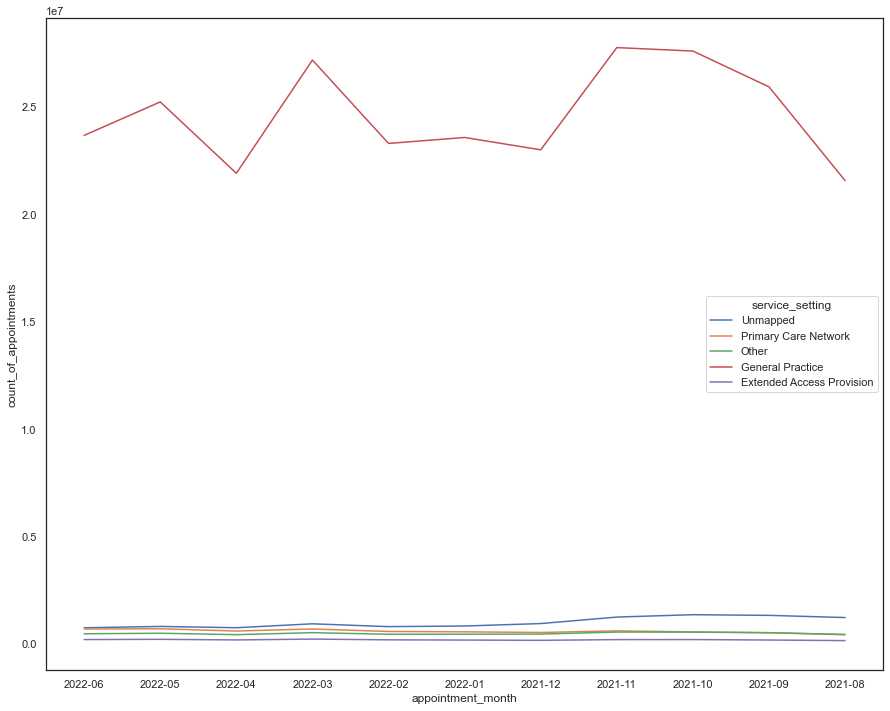

In [61]:
# Creating the line plot
sns.lineplot(x='appointment_month', y='count_of_appointments',hue ='service_setting',data=nc_ss,ci=None)

###### To determine the visualisation for number of appointments per month for 'Context Types'
Using groupby() on 'appointment_month' and 'context_types', then calculating the aggregate of sum() and then by using sort_values() on 'appointment_monmth' and 'context_types'. reset_index() has been used on the dataframe.

In [62]:
# Grouping 'appointment_month' and 'context_type', then calculating the aggregate sum of 'count_of_appointments' using '\' \
# as per PEP8 guidelines


nc_ct = nc.groupby([nc['appointment_month'],nc['context_type']])[['count_of_appointments']].agg('sum').reset_index()\
.sort_values('appointment_month', ascending = False)
# view the nc_ss dataframe
nc_ct

,appointment_month,context_type,count_of_appointments
32,2022-06,Unmapped,758640
31,2022-06,Inconsistent Mapping,2447611
30,2022-06,Care Related Encounter,22621827
29,2022-05,Unmapped,820770
28,2022-05,Inconsistent Mapping,2573495
27,2022-05,Care Related Encounter,24101243
26,2022-04,Unmapped,760313
25,2022-04,Inconsistent Mapping,2248554
24,2022-04,Care Related Encounter,20904193
23,2022-03,Unmapped,942912


<AxesSubplot:xlabel='appointment_month', ylabel='count_of_appointments'>

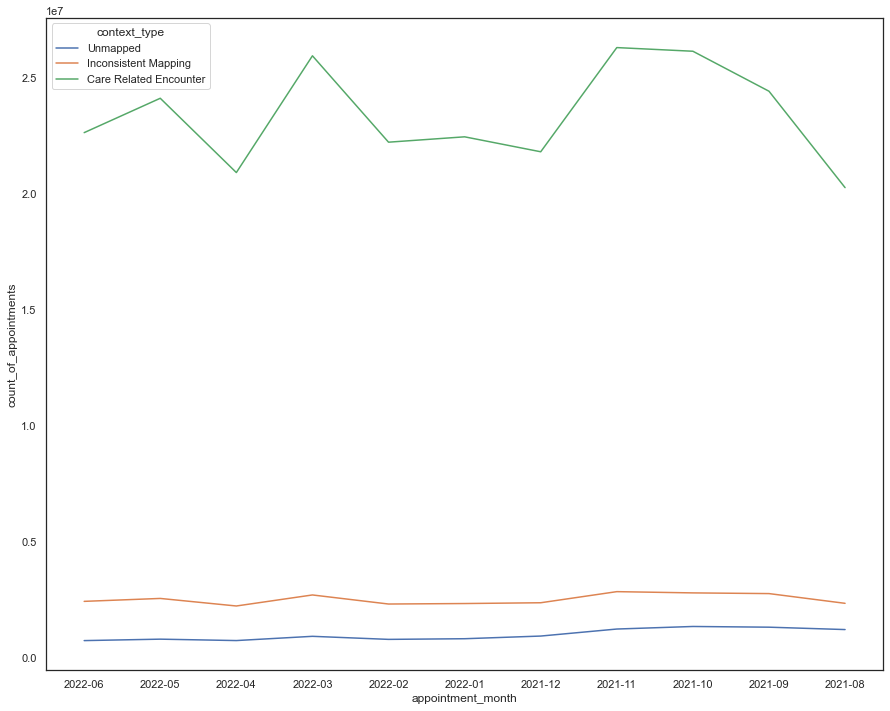

In [63]:
# To plot Line plot with appointment month & count of appointments for Context types
sns.lineplot(x='appointment_month', y='count_of_appointments',hue ='context_type',data=nc_ct,ci=None)

###### To determine the visualisation for number of appointments per month for 'National_Category'
Using groupby() on 'appointment_month' and 'national_category', then calculating the aggregate of sum() and then by using sort_values() on 'appointment_month' and 'national_category'. reset_index() has been used on the dataframe.

In [64]:
# Grouping 'appointment_month' and 'national_categories', then calculating the aggregate sum of 'count_of_appointments' using '\' \
# as per PEP8 guidelines


nc_nc =nc.groupby([nc['appointment_month'],nc['national_category']])[['count_of_appointments']].agg('sum').reset_index()\
.sort_values('appointment_month', ascending = False)
# view the nc_nc dataframe
nc_nc

,appointment_month,national_category,count_of_appointments
197,2022-06,Walk-in,35935
188,2022-06,Non-contractual chargeable work,12942
180,2022-06,Care Home Needs Assessment & Personalised Care and Support Planning,40222
181,2022-06,Care Home Visit,61546
182,2022-06,Clinical Triage,3391163
...,...,...,...
14,2021-08,Structured Medication Review,138570
15,2021-08,Unmapped,1233843
16,2021-08,Unplanned Clinical Activity,241523
17,2021-08,Walk-in,34012


<AxesSubplot:xlabel='appointment_month', ylabel='count_of_appointments'>

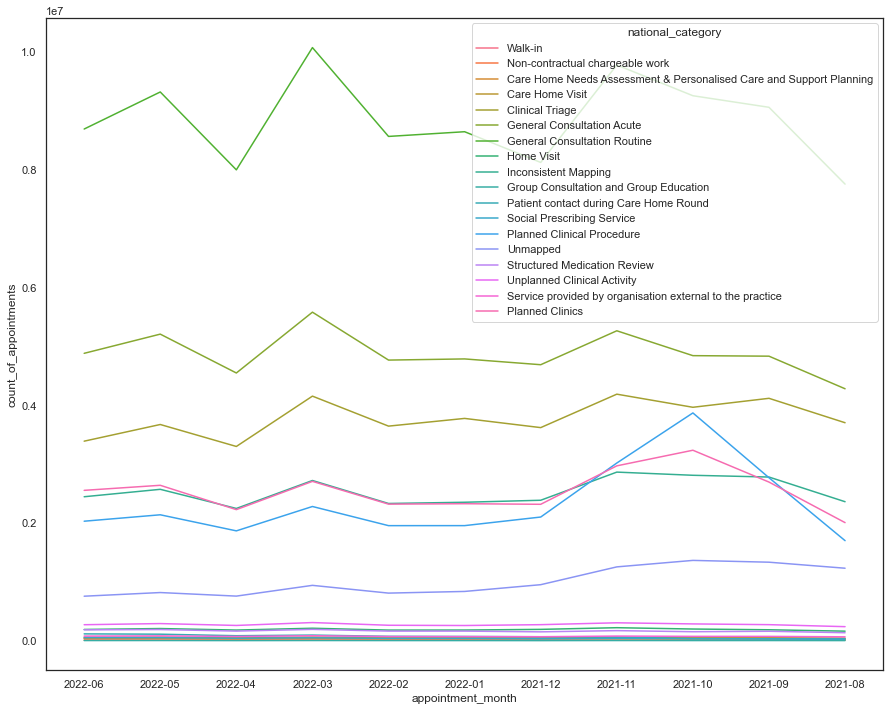

In [65]:
# To plot Line plot with appointment month & count of appointments for Context types
sns.lineplot(x='appointment_month', y='count_of_appointments',hue ='national_category',data=nc_nc,ci=None)

###### To create visualisation for summer (2021) indicating the number of appointments per season.

In [66]:
# creating a new dataframe by filtering the appointment month column 2021-08 for summer(2021)
nc_ss_day = nc[nc['appointment_month']== '2021-08']
nc_ss_day

,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month
0,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Primary Care Network,Care Related Encounter,Patient contact during Care Home Round,3,2021-08
1,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Other,Care Related Encounter,Planned Clinics,7,2021-08
2,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Home Visit,79,2021-08
3,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,General Consultation Acute,725,2021-08
4,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Structured Medication Review,2,2021-08
...,...,...,...,...,...,...,...,...
808176,2021-08-31,E54000054,NHS West Yorkshire ICB - X2C4Y,Other,Care Related Encounter,Clinical Triage,20,2021-08
808177,2021-08-31,E54000054,NHS West Yorkshire ICB - X2C4Y,General Practice,Care Related Encounter,Unplanned Clinical Activity,143,2021-08
808178,2021-08-31,E54000054,NHS West Yorkshire ICB - X2C4Y,Primary Care Network,Care Related Encounter,Social Prescribing Service,7,2021-08
808179,2021-08-31,E54000054,NHS West Yorkshire ICB - X2C4Y,General Practice,Care Related Encounter,Home Visit,36,2021-08


In [67]:
# To find the aggregate appointments per month for Service setting for Summer season , August 2021
nc_ss_day_summer = nc_ss_day.groupby([nc_ss_day['appointment_date'],nc_ss_day['service_setting']])[['count_of_appointments']]\
.agg('sum') \
.reset_index() \
.sort_values(['appointment_date','count_of_appointments'],ascending = False)


                                
nc_ss_day_summer

,appointment_date,service_setting,count_of_appointments
151,2021-08-31,General Practice,1125584
154,2021-08-31,Unmapped,62380
152,2021-08-31,Other,23181
153,2021-08-31,Primary Care Network,21789
150,2021-08-31,Extended Access Provision,8281
...,...,...,...
1,2021-08-01,General Practice,3411
4,2021-08-01,Unmapped,1054
0,2021-08-01,Extended Access Provision,438
2,2021-08-01,Other,401


<AxesSubplot:xlabel='appointment_date', ylabel='count_of_appointments'>

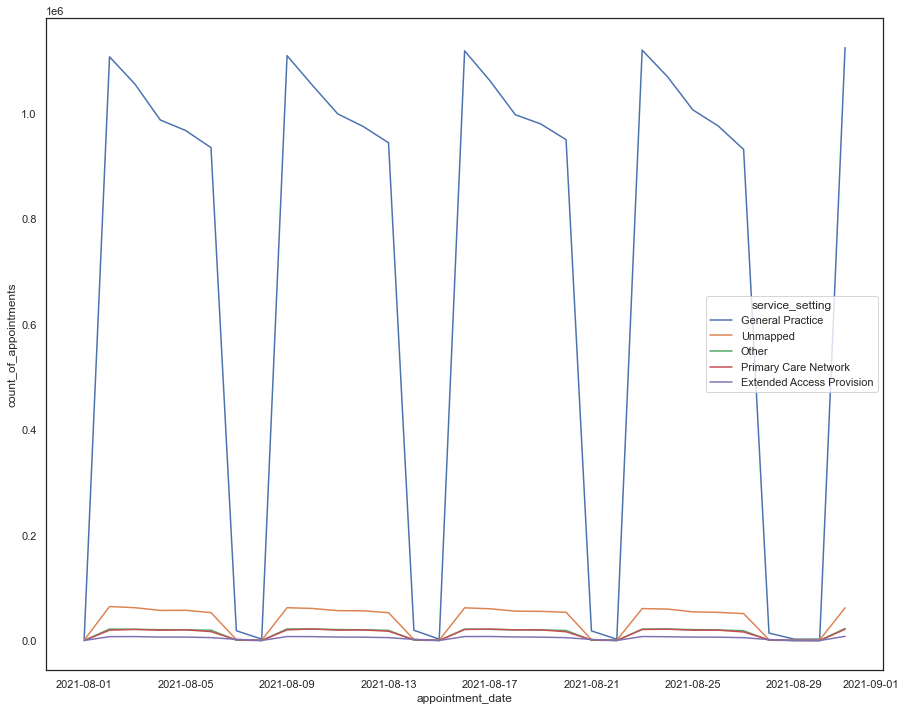

In [68]:
# Creating lineplot visualisation for summer( August 2021)

sns.lineplot(x='appointment_date', y='count_of_appointments',hue ='service_setting',data=nc_ss_day_summer,ci=None)

###### To create visualisation for Autumn (2021) indicating the number of appointments per season.

In [69]:
# creating a new dataframe by filtering the appointment month column 2021-08 for summer(2021)
nc_ss_day = nc[nc['appointment_month']== '2021-10']
nc_ss_day

,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month
1315,2021-10-01,E54000050,NHS North East and North Cumbria ICB - 00L,Primary Care Network,Care Related Encounter,Structured Medication Review,5,2021-10
1316,2021-10-01,E54000050,NHS North East and North Cumbria ICB - 00L,Primary Care Network,Care Related Encounter,Service provided by organisation external to the practice,1,2021-10
1317,2021-10-01,E54000050,NHS North East and North Cumbria ICB - 00L,Primary Care Network,Care Related Encounter,Planned Clinics,38,2021-10
1318,2021-10-01,E54000050,NHS North East and North Cumbria ICB - 00L,Primary Care Network,Care Related Encounter,Planned Clinical Procedure,42,2021-10
1319,2021-10-01,E54000050,NHS North East and North Cumbria ICB - 00L,Other,Inconsistent Mapping,Inconsistent Mapping,27,2021-10
...,...,...,...,...,...,...,...,...
809993,2021-10-30,E54000054,NHS West Yorkshire ICB - X2C4Y,General Practice,Care Related Encounter,Planned Clinical Procedure,620,2021-10
809994,2021-10-30,E54000054,NHS West Yorkshire ICB - X2C4Y,Unmapped,Unmapped,Unmapped,47,2021-10
809995,2021-10-30,E54000054,NHS West Yorkshire ICB - X2C4Y,General Practice,Care Related Encounter,Planned Clinics,508,2021-10
809996,2021-10-31,E54000054,NHS West Yorkshire ICB - X2C4Y,Unmapped,Unmapped,Unmapped,3,2021-10


In [70]:
# To find the aggregate appointments per month for Service setting for Autumn season , October 2021
nc_ss_day_autumn = nc_ss_day.groupby([nc_ss_day['appointment_date'],nc_ss_day['service_setting']])[['count_of_appointments']]\
.agg('sum') \
.reset_index() \
.sort_values(['appointment_date','count_of_appointments'],ascending = False)


In [71]:
nc_ss_day_autumn

,appointment_date,service_setting,count_of_appointments
151,2021-10-31,General Practice,17449
154,2021-10-31,Unmapped,2863
153,2021-10-31,Primary Care Network,1200
152,2021-10-31,Other,1147
150,2021-10-31,Extended Access Provision,1113
...,...,...,...
1,2021-10-01,General Practice,1130646
4,2021-10-01,Unmapped,56201
3,2021-10-01,Primary Care Network,22974
2,2021-10-01,Other,22639


<AxesSubplot:xlabel='appointment_date', ylabel='count_of_appointments'>

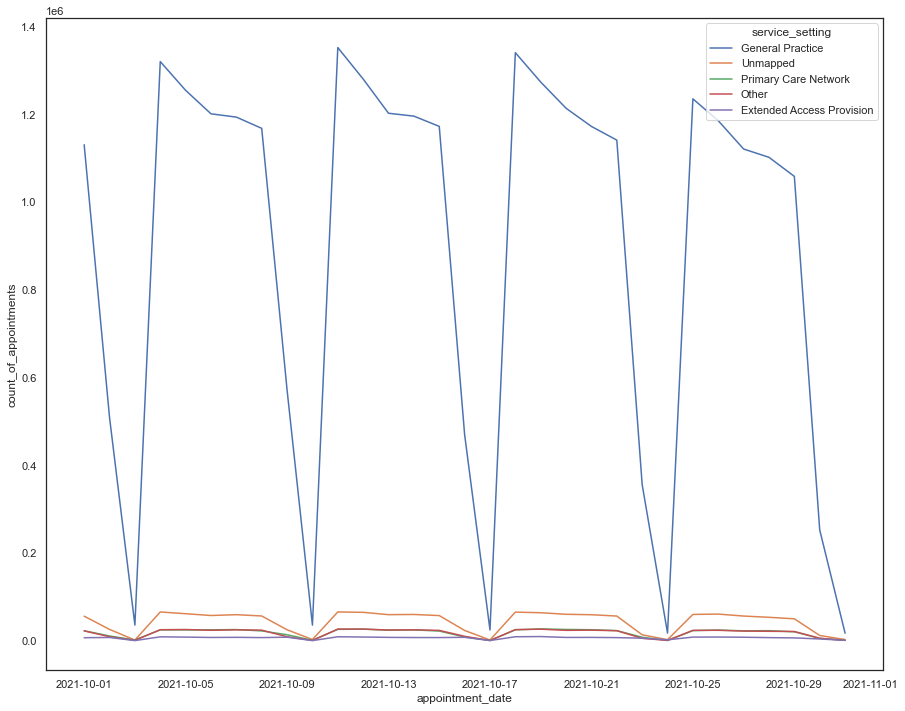

In [72]:
# Creating lineplot visualisation for Autumn(October 2021)

sns.lineplot(x='appointment_date', y='count_of_appointments',hue ='service_setting',data= nc_ss_day_autumn,ci=None)

###### To create visualisation for Winter(2022) indicating the number of appointments per season.

In [73]:
# creating a new dataframe by filtering the appointment month column 2021-08 for summer(2021)
nc_ss_day = nc[nc['appointment_month']== '2022-01']
nc_ss_day

,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month
3273,2022-01-03,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Planned Clinics,10,2022-01
3274,2022-01-03,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,General Consultation Routine,1,2022-01
3275,2022-01-04,E54000050,NHS North East and North Cumbria ICB - 00L,Unmapped,Unmapped,Unmapped,141,2022-01
3276,2022-01-04,E54000050,NHS North East and North Cumbria ICB - 00L,Primary Care Network,Care Related Encounter,Planned Clinics,75,2022-01
3277,2022-01-04,E54000050,NHS North East and North Cumbria ICB - 00L,Primary Care Network,Care Related Encounter,Planned Clinical Procedure,11,2022-01
...,...,...,...,...,...,...,...,...
812754,2022-01-31,E54000054,NHS West Yorkshire ICB - X2C4Y,Extended Access Provision,Care Related Encounter,Planned Clinical Procedure,97,2022-01
812755,2022-01-31,E54000054,NHS West Yorkshire ICB - X2C4Y,Extended Access Provision,Care Related Encounter,Home Visit,1,2022-01
812756,2022-01-31,E54000054,NHS West Yorkshire ICB - X2C4Y,Extended Access Provision,Care Related Encounter,General Consultation Routine,10,2022-01
812757,2022-01-31,E54000054,NHS West Yorkshire ICB - X2C4Y,Extended Access Provision,Care Related Encounter,General Consultation Acute,32,2022-01


In [74]:
# To find the aggregate appointments per month for Service setting for Autumn season , October 2021
nc_ss_day_winter = nc_ss_day.groupby([nc_ss_day['appointment_date'],nc_ss_day['service_setting']])[['count_of_appointments']]\
.agg('sum') \
.reset_index() \
.sort_values(['appointment_date','count_of_appointments'],ascending = False)

nc_ss_day_winter

,appointment_date,service_setting,count_of_appointments
151,2022-01-31,General Practice,1305082
154,2022-01-31,Unmapped,43240
153,2022-01-31,Primary Care Network,30509
152,2022-01-31,Other,25034
150,2022-01-31,Extended Access Provision,9962
...,...,...,...
1,2022-01-01,General Practice,3578
4,2022-01-01,Unmapped,572
2,2022-01-01,Other,280
0,2022-01-01,Extended Access Provision,246


<AxesSubplot:xlabel='appointment_date', ylabel='count_of_appointments'>

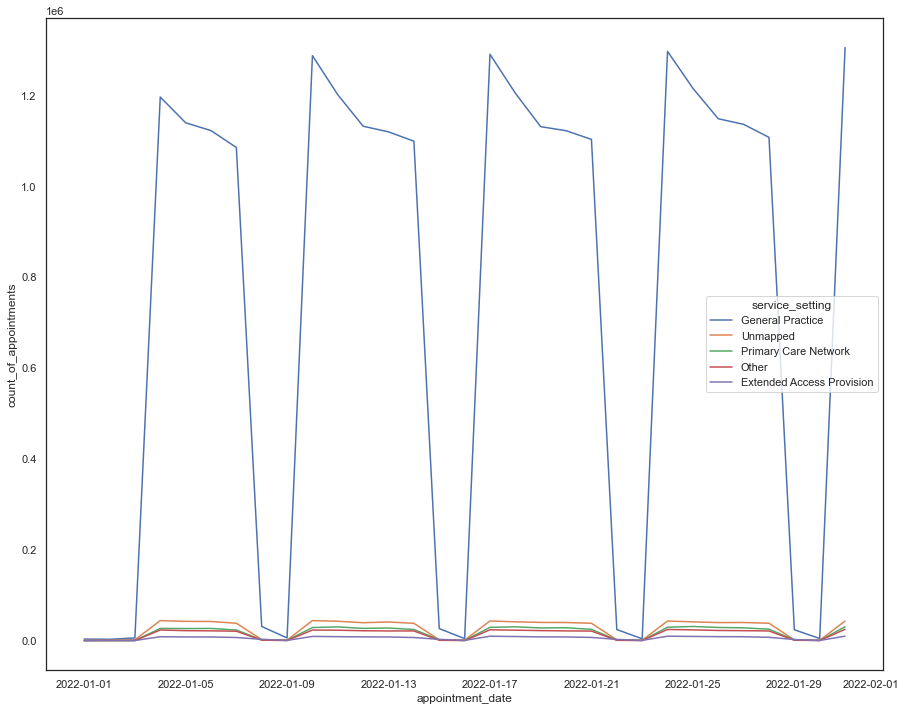

In [75]:
# Creating lineplot visualisation for Winter(January 2022)

sns.lineplot(x='appointment_date', y='count_of_appointments',hue ='service_setting',data= nc_ss_day_winter,ci=None)

###### To create visualisation for Spring(2022) indicating the number of appointments per season.¶

In [76]:
# creating a new dataframe by filtering the appointment month column 2022-04 for Spring(2022)
nc_ss_day = nc[nc['appointment_month']== '2022-04']
nc_ss_day

,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month
5117,2022-04-01,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Care Home Needs Assessment & Personalised Care and Support Planning,68,2022-04
5118,2022-04-01,E54000050,NHS North East and North Cumbria ICB - 00L,Extended Access Provision,Care Related Encounter,Planned Clinics,2,2022-04
5119,2022-04-01,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Clinical Triage,953,2022-04
5120,2022-04-01,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Inconsistent Mapping,Inconsistent Mapping,715,2022-04
5121,2022-04-01,E54000050,NHS North East and North Cumbria ICB - 00L,Primary Care Network,Care Related Encounter,Structured Medication Review,4,2022-04
...,...,...,...,...,...,...,...,...
815522,2022-04-30,E54000054,NHS West Yorkshire ICB - X2C4Y,General Practice,Care Related Encounter,General Consultation Routine,111,2022-04
815523,2022-04-30,E54000054,NHS West Yorkshire ICB - X2C4Y,General Practice,Care Related Encounter,General Consultation Acute,32,2022-04
815524,2022-04-30,E54000054,NHS West Yorkshire ICB - X2C4Y,Extended Access Provision,Care Related Encounter,Planned Clinics,10,2022-04
815525,2022-04-30,E54000054,NHS West Yorkshire ICB - X2C4Y,Extended Access Provision,Care Related Encounter,General Consultation Routine,19,2022-04


In [77]:
# To find the aggregate appointments per month for Service setting for Autumn season , October 2021
nc_ss_day_spring = nc_ss_day.groupby([nc_ss_day['appointment_date'],nc_ss_day['service_setting']])[['count_of_appointments']]\
.agg('sum') \
.reset_index() \
.sort_values(['appointment_date','count_of_appointments'],ascending = False)

nc_ss_day_spring

,appointment_date,service_setting,count_of_appointments
146,2022-04-30,General Practice,23675
145,2022-04-30,Extended Access Provision,3416
148,2022-04-30,Primary Care Network,3150
149,2022-04-30,Unmapped,1844
147,2022-04-30,Other,1148
...,...,...,...
1,2022-04-01,General Practice,1085037
4,2022-04-01,Unmapped,36836
3,2022-04-01,Primary Care Network,26493
2,2022-04-01,Other,21077


<AxesSubplot:xlabel='appointment_date', ylabel='count_of_appointments'>

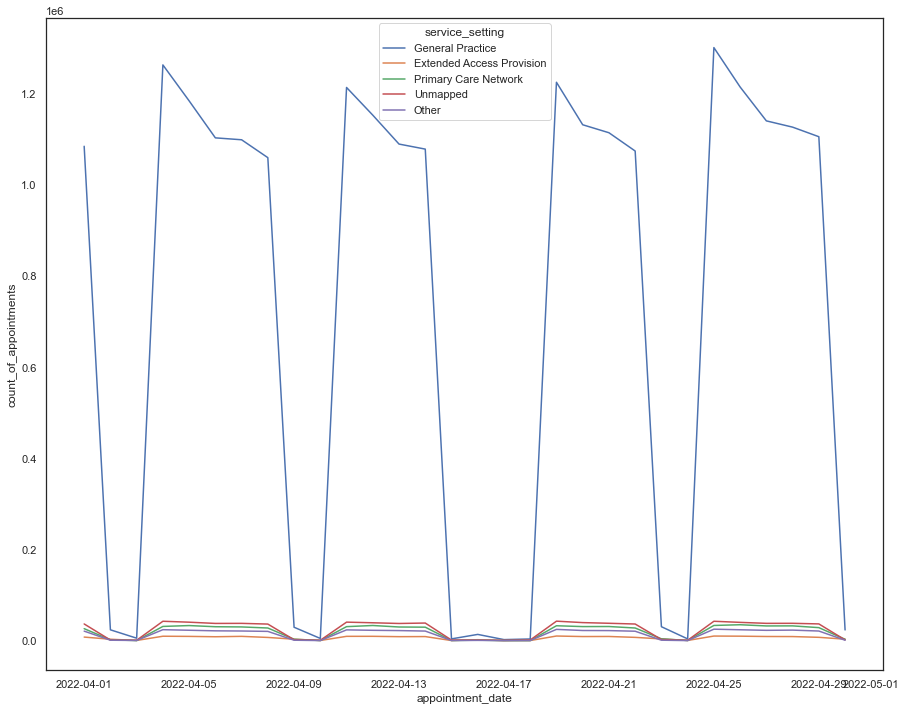

In [78]:
# Creating lineplot visualisation for Spring(April 2022)

sns.lineplot(x='appointment_date', y='count_of_appointments',hue ='service_setting',data= nc_ss_day_spring,ci=None)

###### Twitter API Searching

In [79]:
# reading the tweets.csv files
tweets = pd.read_csv('tweets.csv')

In [80]:
tweets.shape

(1174, 10)

In [81]:
# head of the tweets dataframe
tweets.head()

,tweet_id,tweet_full_text,tweet_entities,tweet_entities_hashtags,tweet_metadata,tweet_retweet_count,tweet_favorite_count,tweet_favorited,tweet_retweeted,tweet_lang
0,1567629223795527681,"As Arkansas’ first Comprehensive Stroke Certified Center, UAMS provides Arkansans with access to the most advanced stoke care. Join us in our mission to make a difference in the health and well-be...","{'hashtags': [{'text': 'Healthcare', 'indices': [253, 264]}], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/yw0cstfmSI', 'expanded_url': 'https://bit.ly/3BiSKbs', 'display_url...",#Healthcare,"{'iso_language_code': 'en', 'result_type': 'recent'}",0,0,False,False,en
1,1567582846612553728,RT @AndreaGrammer: Work-life balance is at the foundation of how decisions are made and where #PremiseHealth is headed. We're #hiring for…,"{'hashtags': [{'text': 'PremiseHealth', 'indices': [94, 108]}, {'text': 'hiring', 'indices': [127, 134]}], 'symbols': [], 'user_mentions': [{'screen_name': 'AndreaGrammer', 'name': 'Andrea Grammer...","#PremiseHealth, #hiring","{'iso_language_code': 'en', 'result_type': 'recent'}",2,0,False,False,en
2,1567582787070304256,RT @OntarioGreens: $10 billion can go a long way to fixing our broken #Healthcare system.\n\nYet Doug Ford would rather spend it ALL on a hig…,"{'hashtags': [{'text': 'Healthcare', 'indices': [70, 81]}], 'symbols': [], 'user_mentions': [{'screen_name': 'OntarioGreens', 'name': 'Green Party of Ontario', 'id': 37115912, 'id_str': '37115912'...",#Healthcare,"{'iso_language_code': 'en', 'result_type': 'recent'}",39,0,False,False,en
3,1567582767625428992,RT @modrnhealthcr: 🚨#NEW:🚨 Insurance companies are figuring out the best ways to collect information about members’ race and ethnicity data…,"{'hashtags': [{'text': 'NEW', 'indices': [20, 24]}], 'symbols': [], 'user_mentions': [{'screen_name': 'modrnhealthcr', 'name': 'Modern Healthcare', 'id': 18935711, 'id_str': '18935711', 'indices':...",#NEW,"{'iso_language_code': 'en', 'result_type': 'recent'}",5,0,False,False,en
4,1567582720460570625,"ICYMI: Our recent blogs on Cybersecurity in Accounting https://t.co/4nnK0FiVVL and Digital Transformation in Healthcare Finance https://t.co/jIqn52lHD3 are a great read, take a look!\n\n#blogs #di...","{'hashtags': [{'text': 'blogs', 'indices': [184, 190]}, {'text': 'digitaltransformation', 'indices': [191, 213]}, {'text': 'cybersecurity', 'indices': [214, 228]}, {'text': 'accounting', 'indices'...","#blogs, #digitaltransformation, #cybersecurity, #accounting, #finance, #healthcare","{'iso_language_code': 'en', 'result_type': 'recent'}",0,0,False,False,en


In [82]:
#describe the tweets
tweets.describe()

,tweet_id,tweet_retweet_count,tweet_favorite_count
count,1.174000e+03,1174.000000,1174.00000
mean,1.567612e+18,8.629472,0.37138
std,2.427553e+13,29.784675,2.04470
min,1.567574e+18,0.000000,0.00000
25%,1.567590e+18,0.000000,0.00000
50%,1.567611e+18,1.000000,0.00000
75%,1.567633e+18,3.000000,0.00000
max,1.567655e+18,303.000000,42.00000


In [83]:
# tweets metadata
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1174 entries, 0 to 1173
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   tweet_id                 1174 non-null   int64 
 1   tweet_full_text          1174 non-null   object
 2   tweet_entities           1174 non-null   object
 3   tweet_entities_hashtags  1007 non-null   object
 4   tweet_metadata           1174 non-null   object
 5   tweet_retweet_count      1174 non-null   int64 
 6   tweet_favorite_count     1174 non-null   int64 
 7   tweet_favorited          1174 non-null   bool  
 8   tweet_retweeted          1174 non-null   bool  
 9   tweet_lang               1174 non-null   object
dtypes: bool(2), int64(3), object(5)
memory usage: 75.8+ KB


In [84]:
# counting the tweet_retweet_count column
tweets['tweet_retweet_count'].value_counts()

0      526
1      215
2      114
3       70
5       35
4       27
7       18
12      16
8       15
73      14
9       13
6       12
208     12
35      10
37       6
11       6
10       5
53       5
44       4
150      4
63       4
76       3
85       3
41       3
62       3
207      3
68       3
78       2
23       2
24       2
72       2
16       2
13       1
49       1
48       1
15       1
107      1
14       1
79       1
20       1
39       1
19       1
303      1
57       1
40       1
54       1
169      1
Name: tweet_retweet_count, dtype: int64

In [85]:
 #counting the tweet_favorite_count  column
tweets['tweet_favorite_count'].value_counts()

0     1027
1       91
2       16
3       13
4        7
5        5
6        2
17       1
12       1
10       1
8        1
13       1
11       1
7        1
20       1
28       1
14       1
18       1
9        1
42       1
Name: tweet_favorite_count, dtype: int64

######  tweet_retweet_count and tweet_favorite_count comparisons
I think after observing the counts of 'tweet_retweet_count' coulmn, it is worth checking this column in more detail, as it gives a pattern and insight of the retweet counts based on a hashtag value. It shows the trending topic  or poularity the hashtag is gaining over a given point in time.

On the otherhand, 'tweet_favorite_count' column doesn't seems that much of a significance , as we can see in the above example. The totals aren't that much higher in number, so I think, retweet_count is worth more further analysing.

In [86]:
# Run a test with #Healthcare in the UK
tweets_nhs = twitter_api.search.tweets(q="#Healthcare in the UK")

# View the output.
tweets_nhs

{'statuses': [{'created_at': 'Sat Dec 10 21:44:03 +0000 2022',
   'id': 1601694256544063490,
   'id_str': '1601694256544063490',
   'text': 'Are you struggling to raise iron levels in your child? We love Spatone liquid https://t.co/eQDNGc5UIT does the job… https://t.co/RvuRPBgmBp',
   'truncated': True,
   'entities': {'hashtags': [],
    'symbols': [],
    'user_mentions': [],
    'urls': [{'url': 'https://t.co/eQDNGc5UIT',
      'expanded_url': 'http://dld.bz/hqEuX',
      'display_url': 'dld.bz/hqEuX',
      'indices': [78, 101]},
     {'url': 'https://t.co/RvuRPBgmBp',
      'expanded_url': 'https://twitter.com/i/web/status/1601694256544063490',
      'display_url': 'twitter.com/i/web/status/1…',
      'indices': [116, 139]}]},
   'metadata': {'iso_language_code': 'en', 'result_type': 'recent'},
   'source': '<a href="https://www.socialoomph.com" rel="nofollow">SocialOomph</a>',
   'in_reply_to_status_id': None,
   'in_reply_to_status_id_str': None,
   'in_reply_to_user_id': None,


In [87]:
# Determine worldwide trends.
trends_worldwide = twitter_api.trends.available()

# How many trends are available?
print(len(trends_worldwide))

# Example of trends_worldwide.
trends_worldwide[0]

467


{'name': 'Worldwide',
 'placeType': {'code': 19, 'name': 'Supername'},
 'url': 'http://where.yahooapis.com/v1/place/1',
 'parentid': 0,
 'country': '',
 'woeid': 1,
 'countryCode': None}

###### Keeping in mind the fundamental questions prompted bythe NHS: a) Where there adequate staff and capacity in the networks b) what was the actual utilisation of the resources?
In answering these queries, various further questions are included below:


In [88]:
# viewing the ar dataframe
ar.head()

,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
0,E54000034,2020-01-01,Attended,GP,Face-to-Face,1 Day,8107
1,E54000034,2020-01-01,Attended,GP,Face-to-Face,15 to 21 Days,6791
2,E54000034,2020-01-01,Attended,GP,Face-to-Face,2 to 7 Days,20686
3,E54000034,2020-01-01,Attended,GP,Face-to-Face,22 to 28 Days,4268
4,E54000034,2020-01-01,Attended,GP,Face-to-Face,8 to 14 Days,11971


In [89]:
ar.dtypes
ar['appointment_month']=ar['appointment_month'].astype(str)
ar.dtypes

icb_ons_code                         object
appointment_month                    object
appointment_status                   object
hcp_type                             object
appointment_mode                     object
time_between_book_and_appointment    object
count_of_appointments                 int64
dtype: object

######  To create various aggregated datasets, only as suggested, appointment dates 08/2021 onwards are only being looked at

In [90]:
# creating a new dataframe with the fileterd date from >= '2021-08' from the original ar dataframe.
ar_agg = ar[ar['appointment_month'] >= '2021-08']

In [91]:
ar_agg.head()

,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
3652,E54000034,2021-08-01,Attended,GP,Face-to-Face,1 Day,6553
3653,E54000034,2021-08-01,Attended,GP,Face-to-Face,15 to 21 Days,2390
3654,E54000034,2021-08-01,Attended,GP,Face-to-Face,2 to 7 Days,10547
3655,E54000034,2021-08-01,Attended,GP,Face-to-Face,22 to 28 Days,937
3656,E54000034,2021-08-01,Attended,GP,Face-to-Face,8 to 14 Days,4961


In [92]:
ar_agg.tail()

,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
596816,E54000050,2022-06-01,Unknown,Unknown,Unknown,2 to 7 Days,21
596817,E54000050,2022-06-01,Unknown,Unknown,Unknown,22 to 28 Days,8
596818,E54000050,2022-06-01,Unknown,Unknown,Unknown,8 to 14 Days,28
596819,E54000050,2022-06-01,Unknown,Unknown,Unknown,More than 28 Days,17
596820,E54000050,2022-06-01,Unknown,Unknown,Unknown,Same Day,10


In [93]:
# Viewing the ar_filter dataframe
ar_agg

,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
3652,E54000034,2021-08-01,Attended,GP,Face-to-Face,1 Day,6553
3653,E54000034,2021-08-01,Attended,GP,Face-to-Face,15 to 21 Days,2390
3654,E54000034,2021-08-01,Attended,GP,Face-to-Face,2 to 7 Days,10547
3655,E54000034,2021-08-01,Attended,GP,Face-to-Face,22 to 28 Days,937
3656,E54000034,2021-08-01,Attended,GP,Face-to-Face,8 to 14 Days,4961
...,...,...,...,...,...,...,...
596816,E54000050,2022-06-01,Unknown,Unknown,Unknown,2 to 7 Days,21
596817,E54000050,2022-06-01,Unknown,Unknown,Unknown,22 to 28 Days,8
596818,E54000050,2022-06-01,Unknown,Unknown,Unknown,8 to 14 Days,28
596819,E54000050,2022-06-01,Unknown,Unknown,Unknown,More than 28 Days,17


###### Should the NHS start looking at increasing staff levels?



In [94]:
# to find out the total appointments per month 


ar_appt_month = ar_agg.groupby('appointment_month')['count_of_appointments'].agg('sum').reset_index()\
.sort_values(['appointment_month','count_of_appointments'], ascending=False)
ar_appt_month

,appointment_month,count_of_appointments
10,2022-06-01,25828078
9,2022-05-01,27495508
8,2022-04-01,23913060
7,2022-03-01,29595038
6,2022-02-01,25355260
5,2022-01-01,25635474
4,2021-12-01,25140776
3,2021-11-01,30405070
2,2021-10-01,30303834
1,2021-09-01,28522501


In [95]:
# hcp_type
# create a new df 


ar_hcptype = ar_agg.groupby([ar_agg['appointment_month'],ar_agg['hcp_type']])[['count_of_appointments']]\
.agg('sum')\
.reset_index()\
.sort_values(['appointment_month','count_of_appointments'],ascending = False)


ar_hcptype

,appointment_month,hcp_type,count_of_appointments
30,2022-06-01,GP,12893983
31,2022-06-01,Other Practice staff,12105677
32,2022-06-01,Unknown,828418
27,2022-05-01,GP,13793934
28,2022-05-01,Other Practice staff,12823200
29,2022-05-01,Unknown,878374
24,2022-04-01,GP,11908463
25,2022-04-01,Other Practice staff,11217738
26,2022-04-01,Unknown,786859
21,2022-03-01,GP,15127227


In [96]:
# appointment_status
#create a new df


ar_appt_status = ar_agg.groupby([ar_agg['appointment_month'],ar_agg['appointment_status']])[['count_of_appointments']]\
.agg('sum')\
.reset_index()\
.sort_values(['appointment_month','count_of_appointments'],ascending = False)
# view the df
ar_appt_status

,appointment_month,appointment_status,count_of_appointments
30,2022-06-01,Attended,23715317
31,2022-06-01,DNA,1167790
32,2022-06-01,Unknown,944971
27,2022-05-01,Attended,25343941
28,2022-05-01,DNA,1199518
29,2022-05-01,Unknown,952049
24,2022-04-01,Attended,21948814
25,2022-04-01,DNA,1045455
26,2022-04-01,Unknown,918791
21,2022-03-01,Attended,27170002


In [97]:
# appointment_mode
#create a new df


ar_appt_mode = ar_agg.groupby([ar_agg['appointment_month'],ar_agg['appointment_mode']])[['count_of_appointments']]\
.agg('sum')\
.reset_index()\
.sort_values(['count_of_appointments','appointment_month'],ascending = False)

# view the df
ar_appt_mode

,appointment_month,appointment_mode,count_of_appointments
10,2021-10-01,Face-to-Face,19471561
15,2021-11-01,Face-to-Face,19031327
35,2022-03-01,Face-to-Face,18333743
45,2022-05-01,Face-to-Face,17630858
5,2021-09-01,Face-to-Face,17266602
50,2022-06-01,Face-to-Face,16744191
30,2022-02-01,Face-to-Face,15531971
25,2022-01-01,Face-to-Face,15414102
20,2021-12-01,Face-to-Face,15312340
40,2022-04-01,Face-to-Face,15049567


In [98]:
# time_between_book_and_appointment



ar_appt_timebook = ar_agg.groupby([ar_agg['appointment_month'],ar_agg['time_between_book_and_appointment']])[['count_of_appointments']]\
.agg('sum')\
.reset_index()\
.sort_values(['count_of_appointments','appointment_month'],ascending = False)
# view the df
ar_appt_timebook


,appointment_month,time_between_book_and_appointment,count_of_appointments
62,2022-03-01,Same Day,13192245
30,2021-11-01,Same Day,12847122
14,2021-09-01,Same Day,12326333
78,2022-05-01,Same Day,12207903
22,2021-10-01,Same Day,12197576
...,...,...,...
47,2022-01-01,Unknown / Data Quality,15683
15,2021-09-01,Unknown / Data Quality,15508
71,2022-04-01,Unknown / Data Quality,15114
39,2021-12-01,Unknown / Data Quality,14248


######  To identify the Utilisations,groupby() is used on 'appointment_month' and total of appointments are calculated. A new claculated column is added called 'util' , which is calculated by  total appoinments per month / 30 and rounded to 1 decimal place.


In [99]:
#  To find out utilisations
ar_df = ar_agg.groupby('appointment_month')['count_of_appointments'].agg('sum').reset_index()\
.sort_values('appointment_month', ascending=False)


In [100]:
ar_df

,appointment_month,count_of_appointments
10,2022-06-01,25828078
9,2022-05-01,27495508
8,2022-04-01,23913060
7,2022-03-01,29595038
6,2022-02-01,25355260
5,2022-01-01,25635474
4,2021-12-01,25140776
3,2021-11-01,30405070
2,2021-10-01,30303834
1,2021-09-01,28522501


In [101]:
# Adding a new calculated column, 'util' 
ar_df_util= ar_df
ar_df_util['util'] = ar_df_util['count_of_appointments'] / 30

In [102]:
ar_df.round(decimals = 1)

,appointment_month,count_of_appointments,util
10,2022-06-01,25828078,860935.9
9,2022-05-01,27495508,916516.9
8,2022-04-01,23913060,797102.0
7,2022-03-01,29595038,986501.3
6,2022-02-01,25355260,845175.3
5,2022-01-01,25635474,854515.8
4,2021-12-01,25140776,838025.9
3,2021-11-01,30405070,1013502.3
2,2021-10-01,30303834,1010127.8
1,2021-09-01,28522501,950750.0


###### Lineplot depicting monthly utilsation as opposed to 1.2million appointments

<AxesSubplot:xlabel='appointment_month', ylabel='util'>

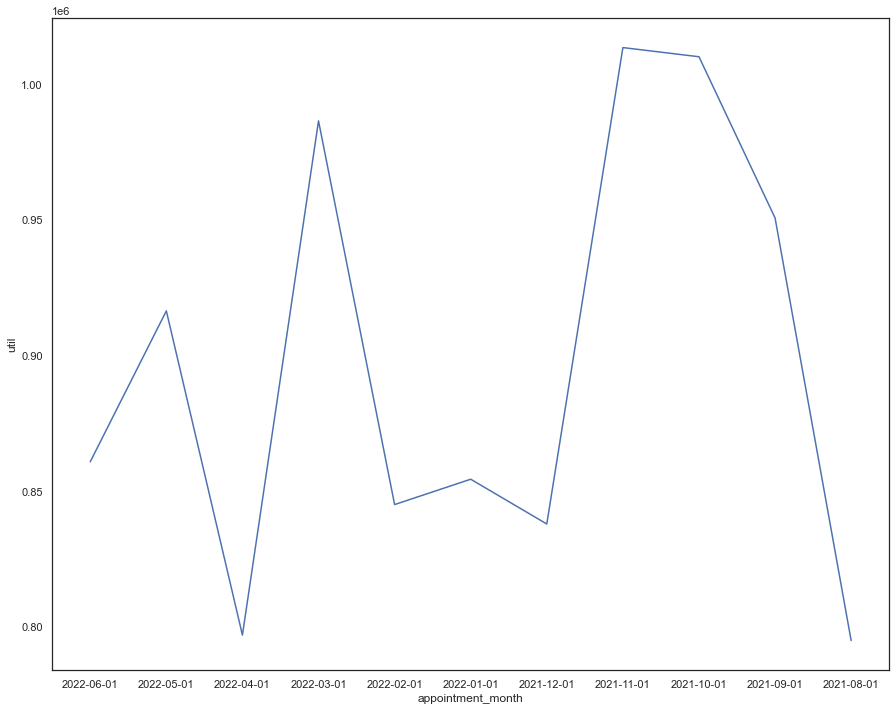

In [103]:
# To plot a lineplot for showing utilisations
sns.lineplot(x='appointment_month', y='util', data= ar_df_util)

<AxesSubplot:xlabel='appointment_month', ylabel='count_of_appointments'>

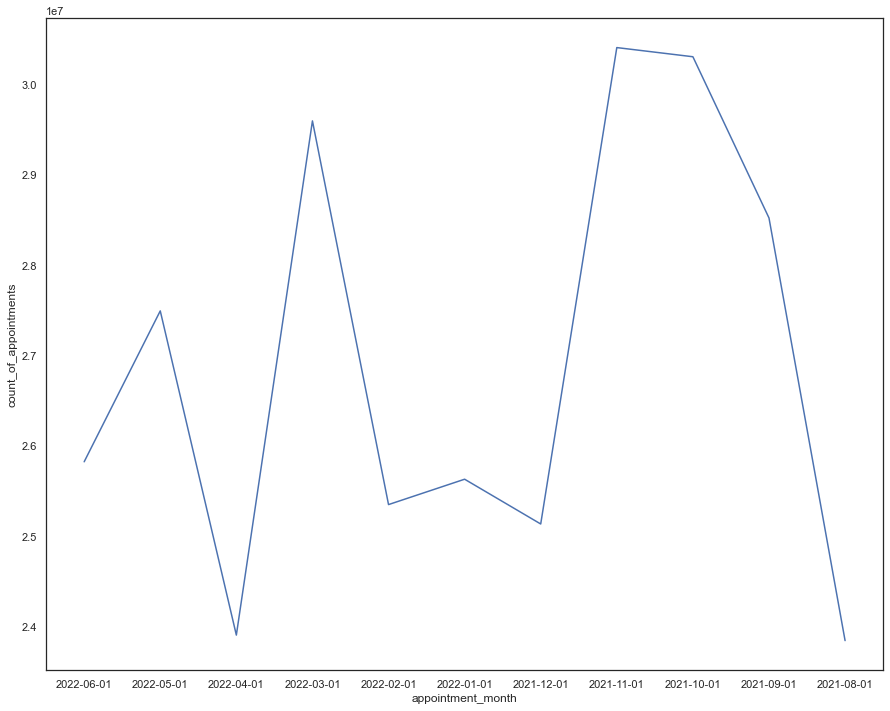

In [104]:
# To plot a lineplot for number of monthly visits
sns.lineplot(x='appointment_month', y='count_of_appointments', data= ar_appt_month)

###### To determine how healthcare professional types differ over time by Line plot

<AxesSubplot:xlabel='appointment_month', ylabel='count_of_appointments'>

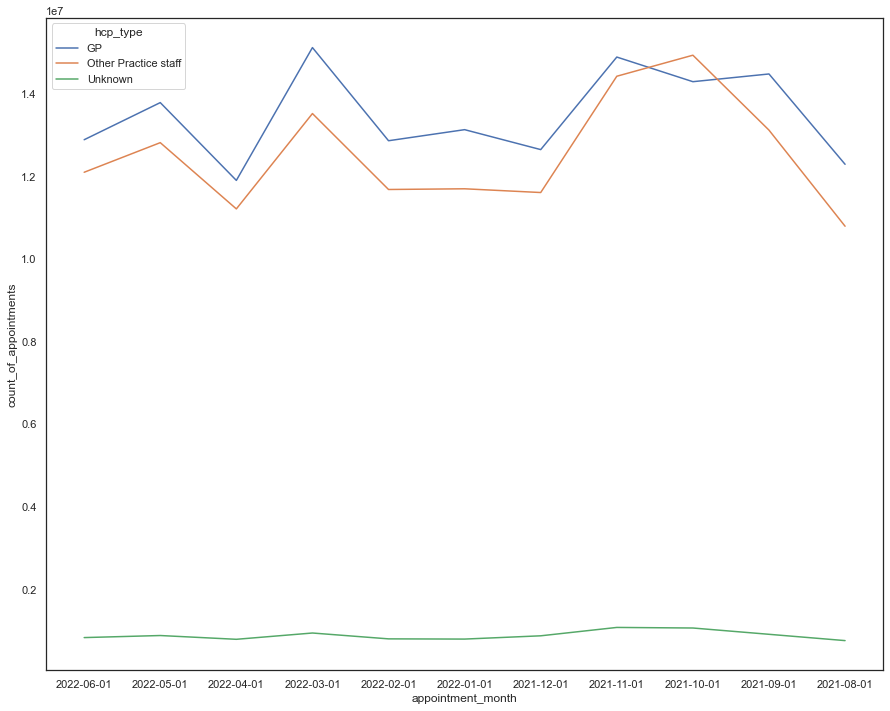

In [105]:
sns.lineplot(x='appointment_month', y='count_of_appointments',hue='hcp_type', data = ar_hcptype)
#sns.lineplot(x='appointment_date', y='count_of_appointments',hue ='service_setting',data= nc_ss_day_spring,ci=None)

###### Are there significant changes in whether or not visits are attended?

<AxesSubplot:xlabel='appointment_month', ylabel='count_of_appointments'>

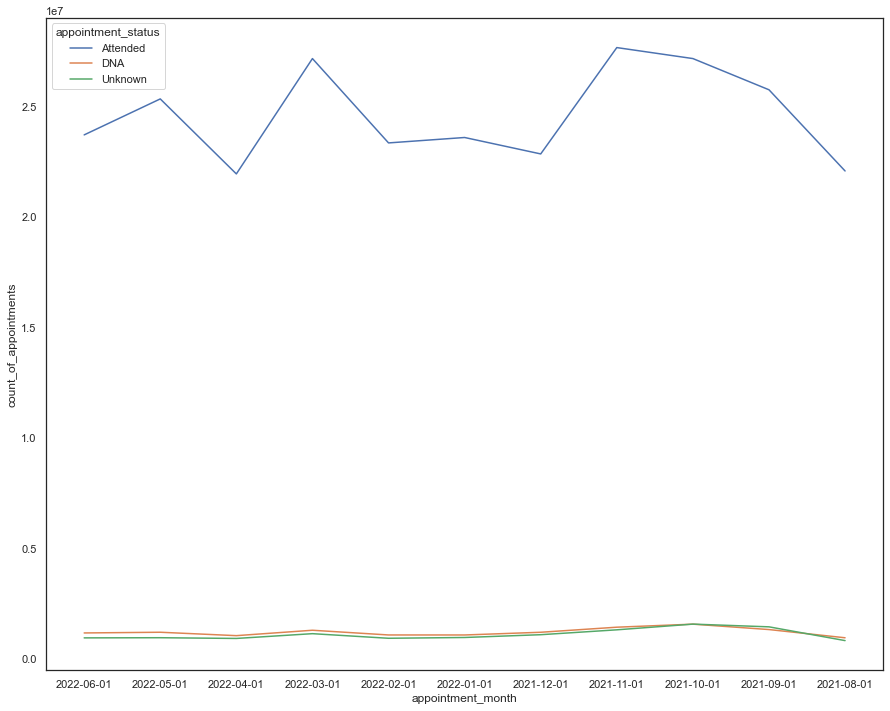

In [106]:
sns.lineplot(x='appointment_month', y='count_of_appointments',hue='appointment_status', data = ar_appt_status)

###### Are there changes in terms of appointment type and the busiest months?

<AxesSubplot:xlabel='appointment_month', ylabel='count_of_appointments'>

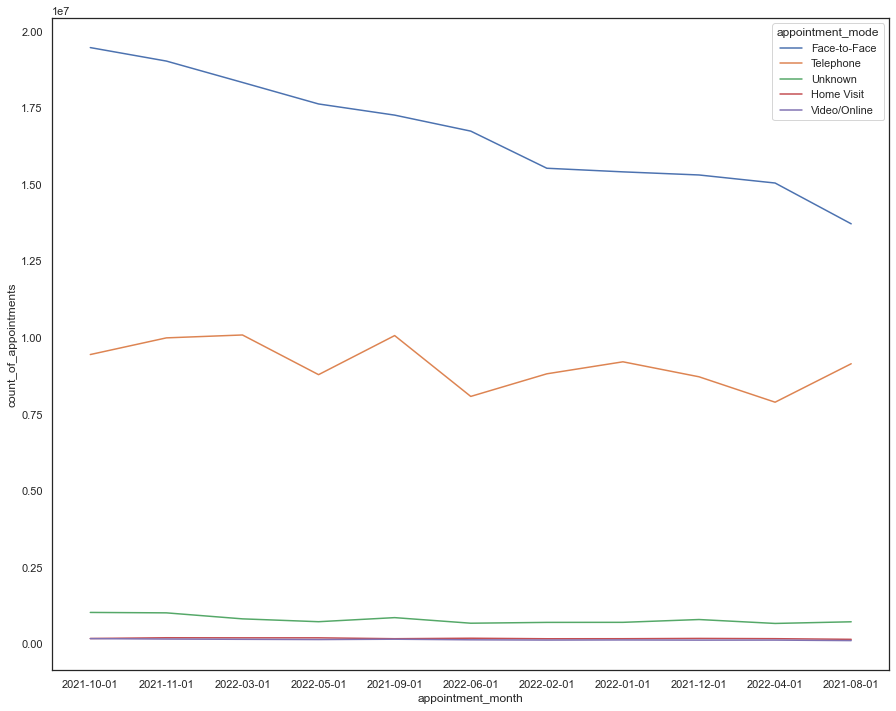

In [107]:
sns.lineplot(x='appointment_month', y='count_of_appointments',hue='appointment_mode', data = ar_appt_mode)

######  Are there any trends in time between booking an appointment?

<AxesSubplot:xlabel='appointment_month', ylabel='count_of_appointments'>

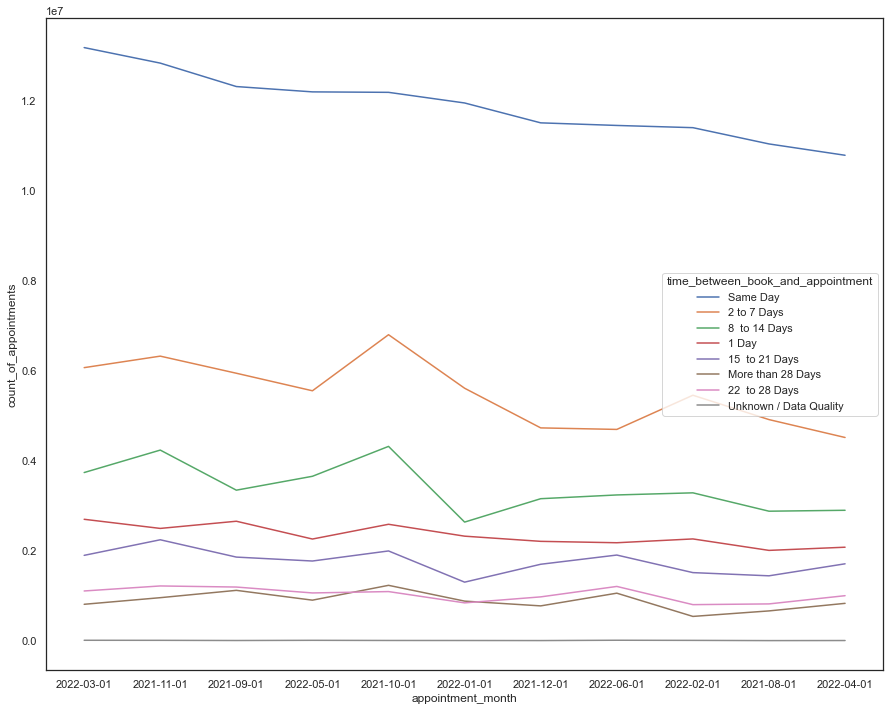

In [108]:
sns.lineplot(x='appointment_month', y='count_of_appointments',hue='time_between_book_and_appointment', data = ar_appt_timebook)

In [109]:

nc.dtypes


appointment_date         datetime64[ns]
icb_ons_code                     object
sub_icb_location_name            object
service_setting                  object
context_type                     object
national_category                object
count_of_appointments             int64
appointment_month                object
dtype: object

In [110]:
nc.head()

,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month
0,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Primary Care Network,Care Related Encounter,Patient contact during Care Home Round,3,2021-08
1,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Other,Care Related Encounter,Planned Clinics,7,2021-08
2,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Home Visit,79,2021-08
3,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,General Consultation Acute,725,2021-08
4,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Structured Medication Review,2,2021-08


###### Comparison of various Service Settings

In [111]:
# Creating a new dataframe from original nc dataframe, by grouping 'appointment_month' and 'service_setting' and using 
#agg('sum')

nc_ss_new = nc.groupby([nc['appointment_month'],nc['service_setting']])[['count_of_appointments']]\
.agg('sum')\
.reset_index()\
.sort_values('count_of_appointments', ascending =False)


In [112]:
# Displaying the data table
nc_ss_new

,appointment_month,service_setting,count_of_appointments
16,2021-11,General Practice,27767889
11,2021-10,General Practice,27606171
36,2022-03,General Practice,27187368
6,2021-09,General Practice,25940821
46,2022-05,General Practice,25238620
51,2022-06,General Practice,23680374
26,2022-01,General Practice,23583053
31,2022-02,General Practice,23305934
21,2021-12,General Practice,23008818
41,2022-04,General Practice,21916791


In [113]:
nc_ss_new.dtypes

appointment_month        object
service_setting          object
count_of_appointments     int64
dtype: object

<AxesSubplot:xlabel='service_setting', ylabel='count_of_appointments'>

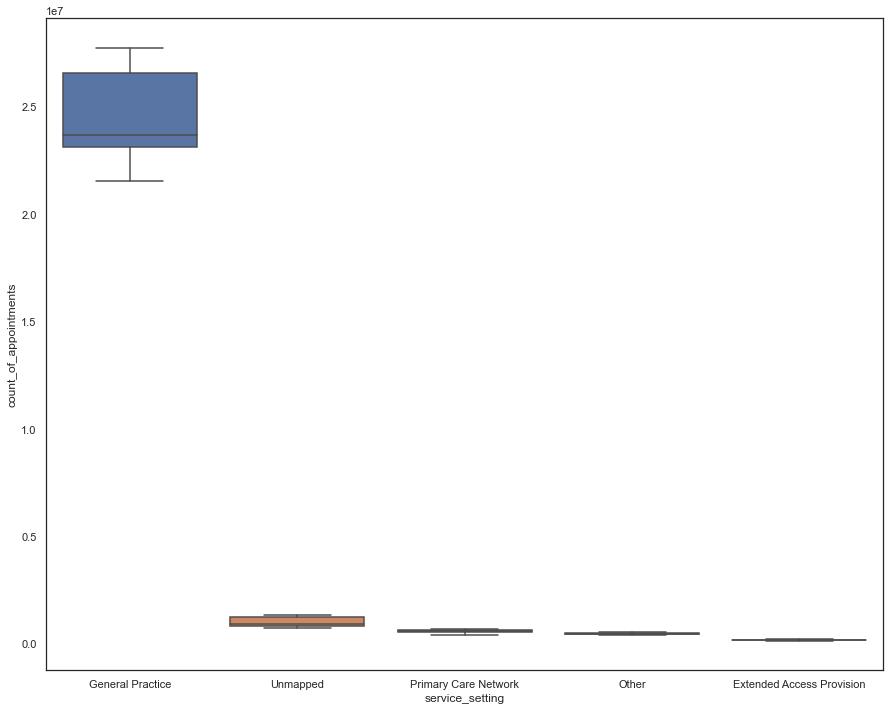

In [114]:
# Generating a Boxplot to visualise the data
sns.boxplot(y='count_of_appointments', x ='service_setting',  data=nc_ss_new)

In [115]:
# Creating a second dataframe excluding General Practice visits from the original 'nc' dataframe
nc_ss_no_gp = nc[nc['service_setting'] != 'General Practice']

In [116]:
nc_ss_no_gp.head()

,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month
0,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Primary Care Network,Care Related Encounter,Patient contact during Care Home Round,3,2021-08
1,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Other,Care Related Encounter,Planned Clinics,7,2021-08
6,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Unmapped,Unmapped,Unmapped,372,2021-08
7,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Primary Care Network,Care Related Encounter,Home Visit,4,2021-08
8,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Other,Care Related Encounter,Clinical Triage,98,2021-08


In [117]:
#nc_ss_new = nc.groupby([nc['appointment_month'],nc['service_setting']])[['count_of_appointments']]\
#.agg('sum')\
#.reset_index()\
#.sort_values('count_of_appointments', ascending =False)

nc_ss_no_gp_new = nc_ss_no_gp.groupby([nc_ss_no_gp['appointment_month'],nc_ss_no_gp['service_setting']])[['count_of_appointments']]\
.agg('sum')\
.reset_index()\
.sort_values('count_of_appointments', ascending =False)

In [118]:
nc_ss_no_gp_new

,appointment_month,service_setting,count_of_appointments
11,2021-10,Unmapped,1366656
7,2021-09,Unmapped,1336115
15,2021-11,Unmapped,1256496
3,2021-08,Unmapped,1233843
19,2021-12,Unmapped,954257
31,2022-03,Unmapped,942912
23,2022-01,Unmapped,839562
39,2022-05,Unmapped,820770
27,2022-02,Unmapped,811246
35,2022-04,Unmapped,760313


<AxesSubplot:xlabel='service_setting', ylabel='count_of_appointments'>

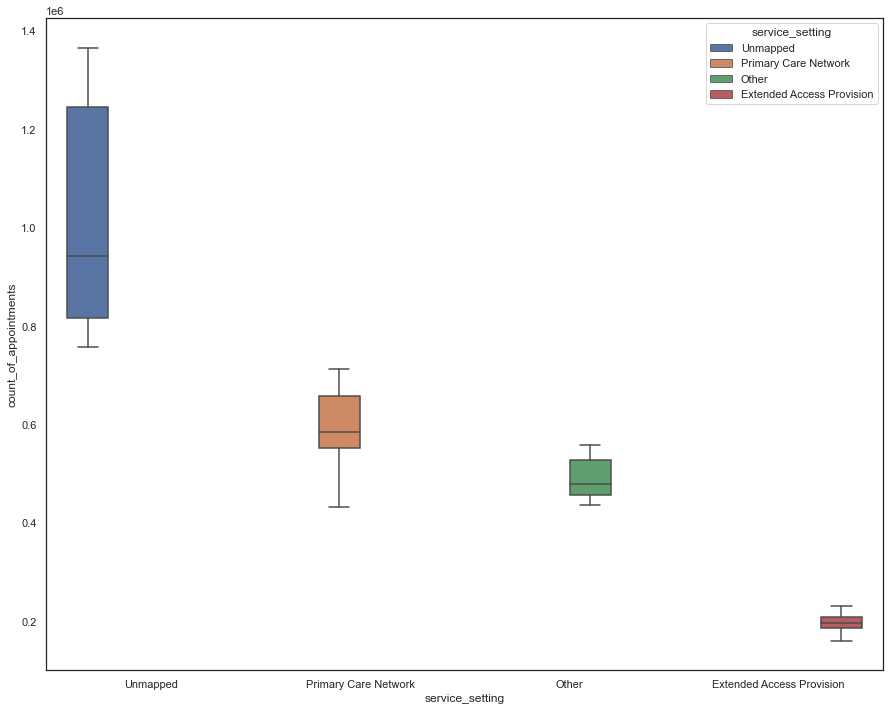

In [119]:
# Generating a Boxplot to visualise the data
sns.boxplot(y='count_of_appointments', x ='service_setting',hue='service_setting',  data=nc_ss_no_gp_new)